In [156]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.express as px
from barPerc import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
pd.set_option('display.max_columns',None)

In [157]:
df = pd.read_csv('movies.csv')
df.head(50)

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN
5,The Dark Knight,2008,152,PG-13,"Action, Crime, Drama","['Christopher Nolan', 'Christian Bale', 'Heath...","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",9.0,84.0,2758250,534.86
6,Schindler's List,1993,195,R,"Biography, Drama, History","['Steven Spielberg', 'Liam Neeson', 'Ralph Fie...","['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...",9.0,95.0,1399258,96.90
7,12 Angry Men,1957,96,Approved,"Crime, Drama","['Sidney Lumet', 'Henry Fonda', 'Lee J. Cobb',...","['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...",9.0,97.0,825348,4.36
8,The Lord of the Rings: The Return of the King,2003,201,PG-13,"Action, Adventure, Drama","['Peter Jackson', 'Elijah Wood', 'Viggo Morten...","['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",9.0,94.0,1905920,377.85
9,The Godfather Part II,1974,202,R,"Crime, Drama","['Francis Ford Coppola', 'Al Pacino', 'Robert ...","['Al Pacino', 'Robert De Niro', 'Robert Duvall...",9.0,90.0,1315944,57.30


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9849 entries, 0 to 9848
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9849 non-null   object 
 1   year         9849 non-null   object 
 2   runtime      9849 non-null   int64  
 3   certificate  9493 non-null   object 
 4   genre        9849 non-null   object 
 5   director     9849 non-null   object 
 6   stars        9849 non-null   object 
 7   rating       9849 non-null   float64
 8   metascore    7876 non-null   float64
 9   votes        9849 non-null   int64  
 10  gross        7015 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 846.5+ KB


In [159]:
df.isna().sum().sort_values(ascending=False)

gross          2834
metascore      1973
certificate     356
title             0
year              0
runtime           0
genre             0
director          0
stars             0
rating            0
votes             0
dtype: int64

In [160]:
df['gross']=df['gross'].fillna(df['gross'].median())

In [161]:
df['certificate'].dropna()

0               R
1               R
2              PG
5           PG-13
6               R
          ...    
9844    Not Rated
9845            R
9846        PG-13
9847            R
9848        PG-13
Name: certificate, Length: 9493, dtype: object

In [162]:
df['metascore']=df['metascore'].fillna(df['metascore'].median())

In [163]:
import re

# Contoh DataFrame
data = {
    'year': [
        'I) (2011', '1944', '1938', 'I) (2021', 'I) (2001', 'I) (1997',
        # ...
        'IV) (2015', 'IV) (2020'
    ]
}


# Fungsi untuk membersihkan data dalam kolom 'year'
def clean_year(year):
    # Menggunakan ekspresi reguler untuk menghapus semua karakter yang bukan angka
    return re.sub(r'[^\d]+', '', year).strip()

# Terapkan fungsi ke dalam kolom 'year'
df['year'] = df['year'].apply(clean_year)

print(df)



                                                title  year  runtime  \
0                            The Shawshank Redemption  1994      142   
1                                       The Godfather  1972      175   
2                 Ramayana: The Legend of Prince Rama  1993      135   
3                                     The Chaos Class  1975       87   
4                                               Daman  2022      121   
...                                               ...   ...      ...   
9844                            Welcome to the Jungle  2013       95   
9845                                        Boat Trip  2002       94   
9846                  Did You Hear About the Morgans?  2009      103   
9847                              The Crow: Salvation  2000      102   
9848  Temptation: Confessions of a Marriage Counselor  2013      111   

     certificate                         genre  \
0              R                         Drama   
1              R                  C

In [164]:
df['year'].unique()

array(['1994', '1972', '1993', '1975', '2022', '2008', '1957', '2003',
       '1974', '2016', '2023', '2021', '1976', '2010', '1999', '2001',
       '1966', '2002', '2006', '2020', '1984', '1982', '2014', '1990',
       '1980', '2018', '1977', '1978', '1985', '1995', '1991', '1998',
       '1997', '1946', '1954', '1962', '2000', '1987', '1996', '2019',
       '1979', '1960', '1988', '2011', '1942', '1968', '1931', '1936',
       '1964', '1959', '1965', '2012', '1981', '1986', '2017', '2009',
       '1950', '1940', '1963', '2004', '2015', '1971', '1945', '1967',
       '1955', '1956', '2005', '2013', '1983', '1969', '2007', '1989',
       '1992', '1939', '1961', '1948', '1953', '1928', '1924', '1952',
       '1949', '1932', '1973', '1934', '1930', '1958', '1926', '1951',
       '1927', '1925', '1937', '1923', '1943', '1941', '1920', '1947',
       '1970', '1921', '1922', '1933', '1944', '1938', '1935', '1929',
       '1916', '1919', '1915'], dtype=object)

In [165]:
df['year']=pd.to_datetime(df['year'])

In [166]:
df['certificate'].fillna('Not Rated',inplace=True)

In [167]:
df.isna().sum()

title          0
year           0
runtime        0
certificate    0
genre          0
director       0
stars          0
rating         0
metascore      0
votes          0
gross          0
dtype: int64

In [168]:
df.duplicated().sum()

0

In [169]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9849 entries, 0 to 9848
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        9849 non-null   object        
 1   year         9849 non-null   datetime64[ns]
 2   runtime      9849 non-null   int64         
 3   certificate  9849 non-null   object        
 4   genre        9849 non-null   object        
 5   director     9849 non-null   object        
 6   stars        9849 non-null   object        
 7   rating       9849 non-null   float64       
 8   metascore    9849 non-null   float64       
 9   votes        9849 non-null   int64         
 10  gross        9849 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 846.5+ KB


In [170]:
df_to_plot = df.select_dtypes(include=['float','int'])

In [171]:
df_to_plot

,runtime,rating,metascore,votes,gross
0,142,9.3,82.0,2780534,28.34
1,175,9.2,100.0,1935895,134.97
2,135,9.2,59.5,12470,17.04
3,87,9.2,59.5,42018,17.04
4,121,9.1,59.5,13372,17.04
...,...,...,...,...,...
9844,95,4.9,25.0,13770,17.04
9845,94,4.9,18.0,31972,8.59
9846,103,4.9,27.0,41830,29.58
9847,102,4.9,59.5,11938,17.04


runtime         AxesSubplot(0.125,0.653529;0.352273x0.226471)
rating       AxesSubplot(0.547727,0.653529;0.352273x0.226471)
metascore       AxesSubplot(0.125,0.381765;0.352273x0.226471)
votes        AxesSubplot(0.547727,0.381765;0.352273x0.226471)
gross               AxesSubplot(0.125,0.11;0.352273x0.226471)
dtype: object

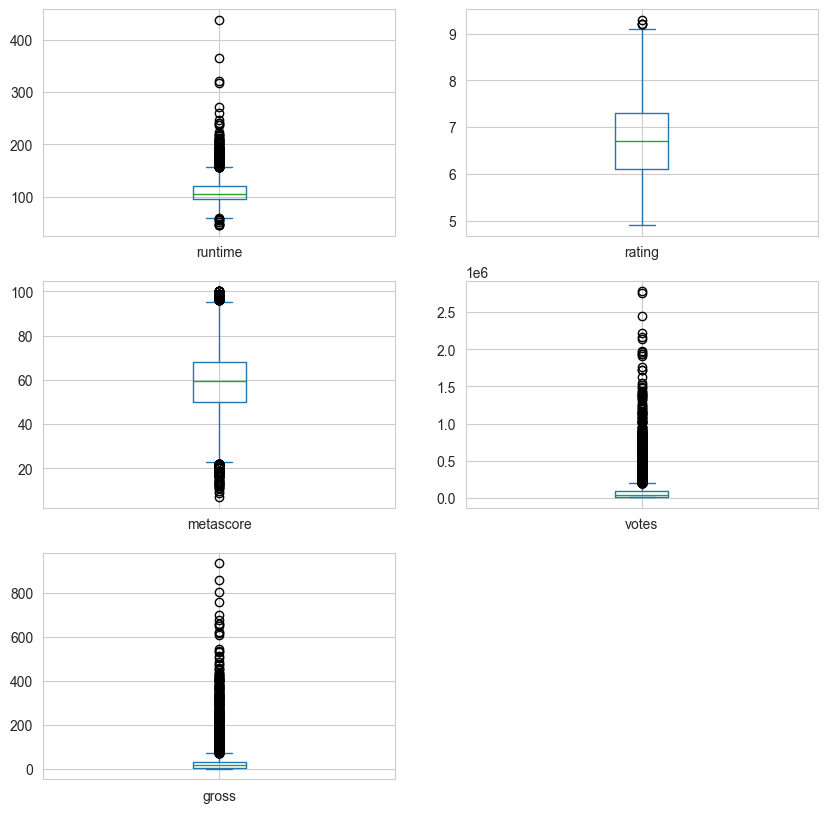

In [172]:
df_to_plot.plot(kind='box', subplots=True, layout=(3,2), figsize=(10,10))

C:\Users\SHINIGAMI\AppData\Local\Temp\ipykernel_31136\2891703059.py:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'rating'}>],
       [<AxesSubplot:title={'center':'metascore'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'gross'}>, <AxesSubplot:>]],
      dtype=object)

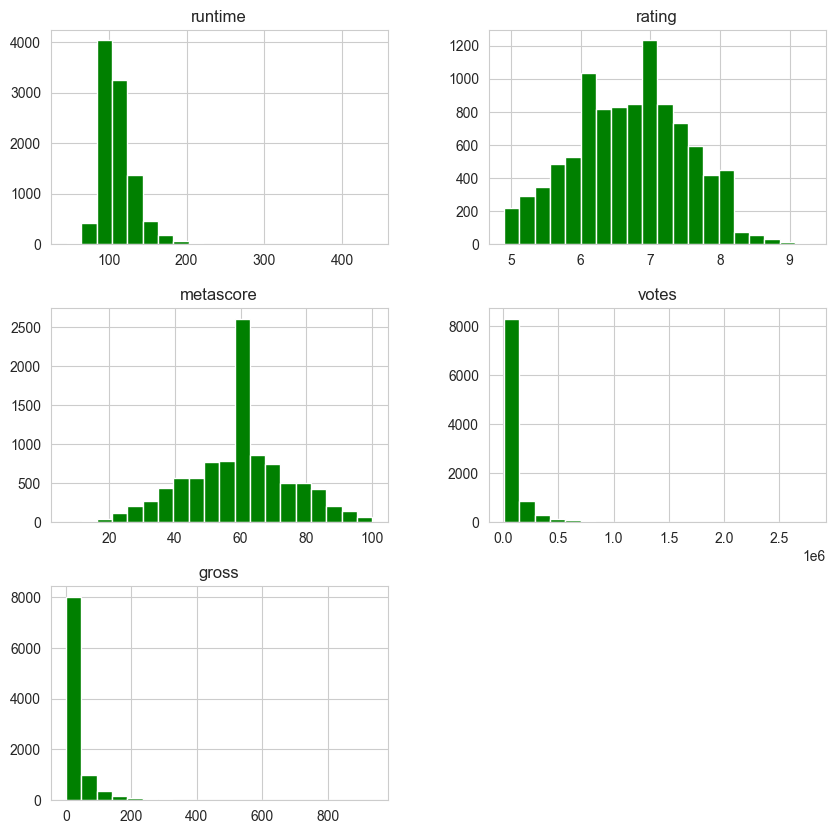

In [173]:
numeric = df_to_plot.columns

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
df.hist(ax=ax,column=numeric,bins=20,color='green')

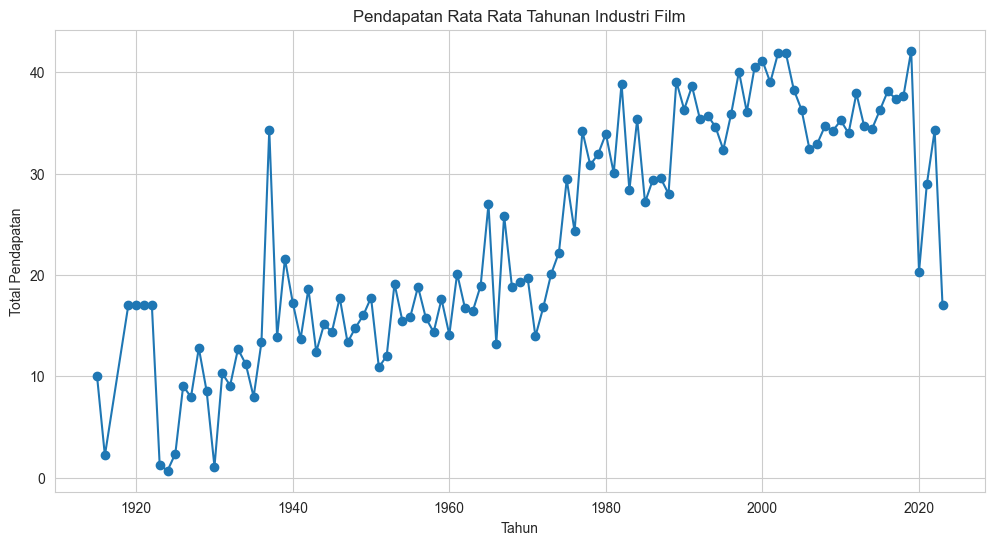

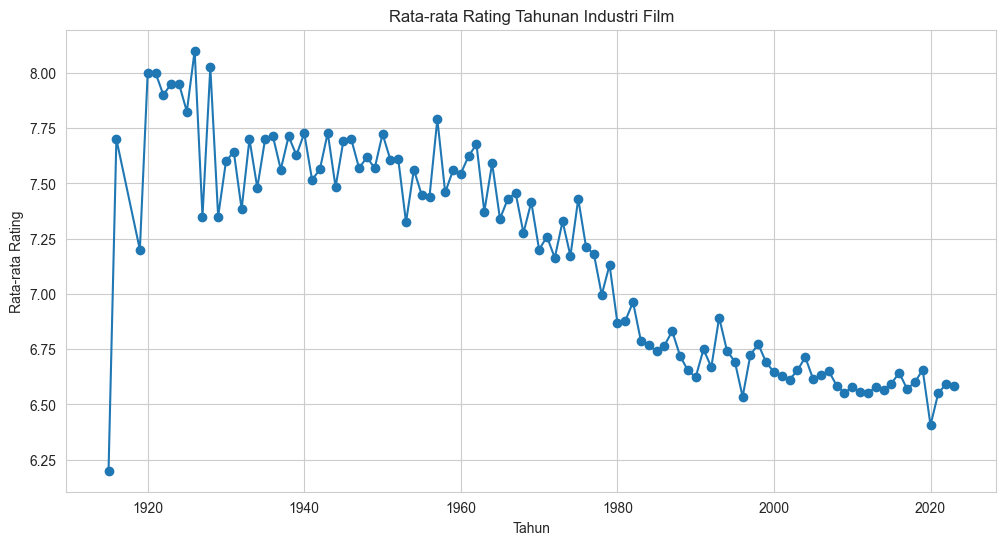

In [174]:
# Ubah kolom 'release_date' menjadi tipe data datetime


# Kelompokkan data berdasarkan tahun rilis
yearly_gross = df.groupby(df['year'].dt.year)['gross'].mean()
yearly_rating = df.groupby(df['year'].dt.year)['rating'].mean()

# Plot pendapatan tahunan
plt.figure(figsize=(12, 6))
plt.plot(yearly_gross.index, yearly_gross.values, marker='o', linestyle='-')
plt.title('Pendapatan Rata Rata Tahunan Industri Film')
plt.xlabel('Tahun')
plt.ylabel('Total Pendapatan')
plt.grid(True)
plt.show()

# Plot rata-rata rating tahunan
plt.figure(figsize=(12, 6))
plt.plot(yearly_rating.index, yearly_rating.values, marker='o', linestyle='-')
plt.title('Rata-rata Rating Tahunan Industri Film')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Rating')
plt.grid(True)
plt.show()



In [175]:
df.head()

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994-01-01,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972-01-01,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993-01-01,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,59.5,12470,17.04
3,The Chaos Class,1975-01-01,87,Not Rated,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,59.5,42018,17.04
4,Daman,2022-01-01,121,Not Rated,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,59.5,13372,17.04


In [176]:
for column in df[['year', 'rating', 'genre']].columns:
    count = df[column].value_counts().sort_index()
    
    trace = go.Bar(
        x = count.index,
        y= count.values,
        name = f'{column} distrinution'
    )
    fig = go.Figure(trace)
    fig.update_layout(
        xaxis = dict(title=column),
        yaxis = dict(title='count')
    )
    fig.show()

In [177]:
ave_rating_by_year = df.groupby('year')['runtime'].mean().reset_index(name='average')
fig = px.line(
    ave_rating_by_year,
    title = 'Average by Runtime',
    x = 'year',
    y = 'average',
    labels={'average': 'Average Runtime'}
)
fig.show()

In [178]:
ave_rating_by_year = df.groupby('year')['rating'].mean().reset_index(name='average')
fig = px.line(
    ave_rating_by_year,
    x='year',
    y= 'average',
    title='Average Rating By Year'
    
)
fig.show()


In [179]:
top_20_film = df.sort_values(by='rating',ascending=False).head(20)
fig = px.bar(
    top_20_film,
    x = 'title',
    color = 'genre',
    y= 'rating'
)
fig.show()

In [180]:
top_20_meta_score = df.sort_values(by='metascore',ascending=False).head(20)
fig = px.bar(
    top_20_film,
    x = 'title',
    y = 'metascore',
    color = 'genre',
    title='top 20 meta score film'
)
fig.show()

In [181]:
top_20_vote_fil = df.sort_values(by='votes', ascending=False).head(20)
fig = px.bar(
    top_20_vote_fil,
    x = 'title',
    color = 'genre',
    title='top 20 film by vote',
    y = 'votes'
    
)
fig.show()

In [182]:
top_20_groos = df.sort_values(by='gross',ascending=False).head(20)
fig = px.bar(
    top_20_groos,
    x = 'title',
    y='gross',
    color='genre',
    title='top 20 gross film'
)
fig.show()

In [183]:
#top_20_directors productivity
top_20_directors = df.sort_values(by='gross', ascending=False).head(20)
fig = px.bar(
    top_20_directors,
    x = 'title',
    y = 'gross',
    color = 'director'
)
fig.show()


In [184]:


#histogram for year dist by certificate
fig = px.histogram(
    df,
    x='year',
    color='certificate',
    nbins=20,
    title="Year Distribution by Certificate",
    labels={'certificate': 'Certificate', column: column},
    opacity=0.7,
).update_xaxes(categoryorder="category ascending")

# Show the plot
fig.show()




In [185]:
df[['rating','gross']].corr()[['gross']].sort_values(by='gross',ascending=False)

,gross
gross,1.000000
rating,0.066645


In [186]:
df[['votes','gross']].corr()[['gross']].sort_values(by='gross',ascending=False)

,gross
gross,1.000000
votes,0.631305


In [187]:
df[['metascore','gross']].corr()[['gross']].sort_values(by='gross',ascending=False)

,gross
gross,1.000000
metascore,0.025935


In [188]:
df = pd.read_csv('movies.csv')
df.shape

(9849, 11)

In [189]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=1)

In [190]:
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [191]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(5909, 11)
(1970, 11)
(1970, 11)


In [192]:
df_train.isna().sum()

title             0
year              0
runtime           0
certificate     212
genre             0
director          0
stars             0
rating            0
metascore      1120
votes             0
gross          1720
dtype: int64

In [193]:
df_train['certificate']=df_train['certificate'].fillna('unknown')
df_test['certificate'] =df_test['certificate'].fillna('unknown')
df_valid['certificate']=df_valid['certificate'].fillna('unknown')

In [194]:
df_train['gross']=df_train['gross'].fillna(df['gross'].median())
df_test['gross'] =df_test['gross'].fillna(df['gross'].median())
df_valid['gross']=df_valid['gross'].fillna(df['gross'].median())

In [195]:
df_train['metascore']=df_train['metascore'].fillna(df['gross'].median())
df_test['metascore'] =df_test['metascore'].fillna(df['gross'].median())
df_valid['metascore']=df_valid['metascore'].fillna(df['gross'].median())

In [196]:
df_train.isna().sum()

title          0
year           0
runtime        0
certificate    0
genre          0
director       0
stars          0
rating         0
metascore      0
votes          0
gross          0
dtype: int64

In [197]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5909 entries, 1577 to 7171
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        5909 non-null   object 
 1   year         5909 non-null   object 
 2   runtime      5909 non-null   int64  
 3   certificate  5909 non-null   object 
 4   genre        5909 non-null   object 
 5   director     5909 non-null   object 
 6   stars        5909 non-null   object 
 7   rating       5909 non-null   float64
 8   metascore    5909 non-null   float64
 9   votes        5909 non-null   int64  
 10  gross        5909 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 554.0+ KB


In [198]:
import re

# Contoh DataFrame
data = {
    'year': [
        'I) (2011', '1944', '1938', 'I) (2021', 'I) (2001', 'I) (1997',
        # ...
        'IV) (2015', 'IV) (2020'
    ]
}


# Fungsi untuk membersihkan data dalam kolom 'year'
def clean_year(year):
    # Menggunakan ekspresi reguler untuk menghapus semua karakter yang bukan angka
    return re.sub(r'[^\d]+', '', year).strip()

# Terapkan fungsi ke dalam kolom 'year'
df_train['year'] = df_train['year'].apply(clean_year)
df_test['year'] = df_test['year'].apply(clean_year)
df_valid['year'] = df_valid['year'].apply(clean_year)


In [199]:
df_train['year'] = pd.to_datetime(df_train['year'])
df_test['year'] = pd.to_datetime(df_test['year'])
df_valid['year'] = pd.to_datetime(df_valid['year'])


In [200]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5909 entries, 1577 to 7171
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        5909 non-null   object        
 1   year         5909 non-null   datetime64[ns]
 2   runtime      5909 non-null   int64         
 3   certificate  5909 non-null   object        
 4   genre        5909 non-null   object        
 5   director     5909 non-null   object        
 6   stars        5909 non-null   object        
 7   rating       5909 non-null   float64       
 8   metascore    5909 non-null   float64       
 9   votes        5909 non-null   int64         
 10  gross        5909 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 554.0+ KB


In [201]:
features = ['rating','metascore','votes']
x_train =  df_train[features]
x_valid = df_valid[features]
x_test = df_test[features]

In [202]:
x_train_final = x_train
x_valid_final = x_valid
x_test_final = x_test

In [203]:
y_train_final = df_train.gross
y_test_final = df_test.gross
y_valid_final = df_valid.gross

In [228]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Linear Regression
model = RandomForestRegressor(random_state=42)

# Latih model dengan data pelatihan
model.fit(x_train_final, y_train_final)


RandomForestRegressor(random_state=42)

In [221]:
y_valid_pred = model.predict(x_valid_final)

In [222]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_valid_final,y_valid_pred))

19.98318138747885


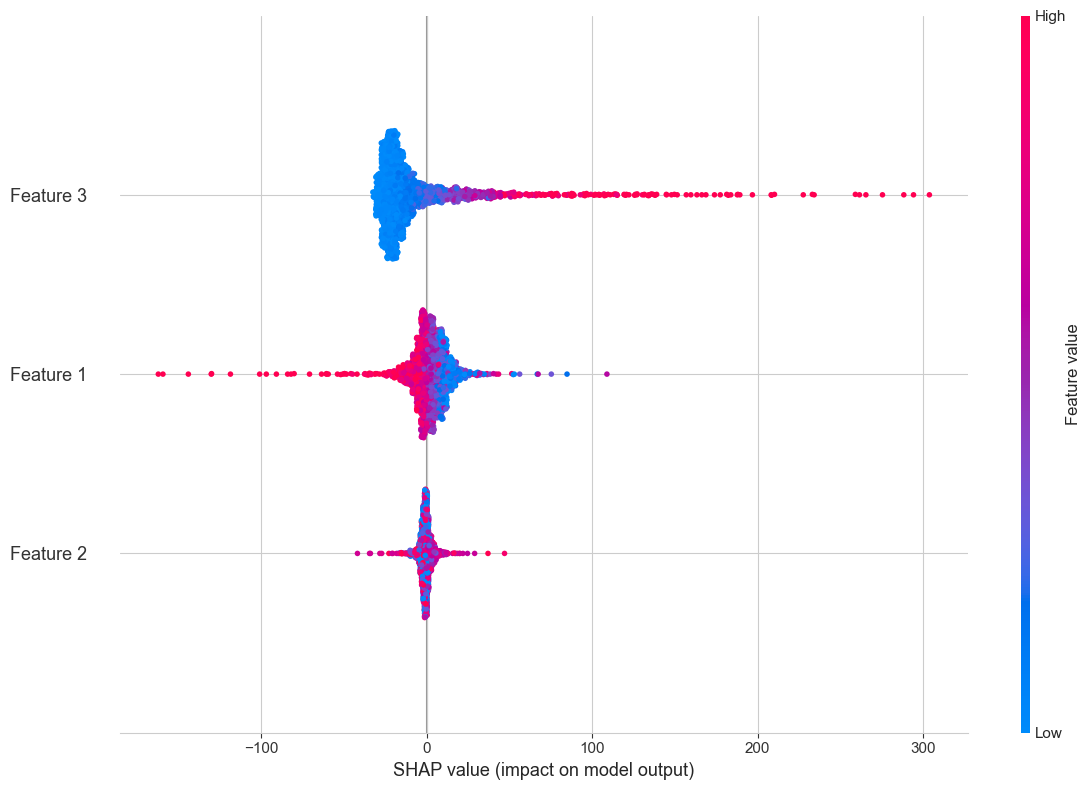

In [231]:
import shap
import matplotlib.pyplot as plt
# Menghitung SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x_valid_final)

# Menampilkan plot SHAP untuk fitur pertama
shap.summary_plot(shap_values, features=x_valid_final, feature_names=["Feature 1", "Feature 2", "Feature 3"], max_display=10, plot_size=[12, 8])

plt.show()